In [1]:
import nashpy as nash
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Задание 1

In [2]:
df = pd.read_csv('task8.csv', delimiter=';', encoding='utf-8', index_col=0)
df

,Телефоны,Ноутбуки,Наушники
Телефоны,300,280,230
Ноутбуки,200,180,130
ПК,240,380,400


In [3]:
np_data = df.values
np_data

array([[300, 280, 230],
       [200, 180, 130],
       [240, 380, 400]], dtype=int64)

In [4]:
np.min(np_data, axis=1)

array([230, 130, 240], dtype=int64)

In [5]:
np.max(np.min(np_data, axis=1))
print('Цена игры для игрока А\nпри выборе чистой оптимальной стратегии: ', np.max(np.min(np_data, axis=1)))

Цена игры для игрока А
при выборе чистой оптимальной стратегии:  240


In [6]:
df.index[np.argmax(np.min(np_data, axis=1))]
print('Оптимальная чистая стратегия для игрока А: ', df.index[np.argmax(np.min(np_data, axis=1))])

Оптимальная чистая стратегия для игрока А:  ПК


In [7]:
np.max(np_data, axis=0)

array([300, 380, 400], dtype=int64)

In [8]:
np.min(np.max(np_data, axis=0))
print('Цена игры для игрока Б\nпри выборе чистой оптимальной стратегии: ', np.min(np.max(np_data, axis=0)))

Цена игры для игрока Б
при выборе чистой оптимальной стратегии:  300


In [9]:
df.index[np.argmin(np.max(np_data, axis=0))]
print('Оптимальная чистая стратегия для игрока Б: ', df.index[np.argmin(np.max(np_data, axis=0))])

Оптимальная чистая стратегия для игрока Б:  Телефоны


In [10]:
problem = LpProblem('Task 1', LpMinimize)

c:\users\irong\desktop\python\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [11]:
x1 = LpVariable('x1', lowBound=0)
x2 = LpVariable('x2', lowBound=0)
x3 = LpVariable('x3', lowBound=0)

In [12]:
#Целевая
problem += x1 + x2 + x3

In [13]:
#Ограничения

problem += np_data[0][0] * x1 + np_data[1][0] * x2 + np_data[2][0] * x3 >= 1
problem += np_data[0][1] * x1 + np_data[1][1] * x2 + np_data[2][1] * x3 >= 1
problem += np_data[0][2] * x1 + np_data[1][2] * x2 + np_data[2][2] * x3 >= 1

In [14]:
problem.solve()
print("x1: ", x1.varValue)
print("x2: ", x2.varValue)
print("x3: ", x3.varValue)
print("Целевая: ", value(problem.objective))

x1:  0.0024691358
x2:  0.0
x3:  0.0010802469
Целевая:  0.0035493827


In [15]:
print("Цена игры: ", round(1/value(problem.objective),2))

Цена игры:  281.74


In [16]:
print('Стратегия P1: ', round((1/value(problem.objective)) * x1.varValue *100), '%')
print('Стратегия P2: ', round((1/value(problem.objective)) * x2.varValue *100), '%')
print('Стратегия P3: ', round((1/value(problem.objective)) * x3.varValue *100), '%')

Стратегия P1:  70 %
Стратегия P2:  0 %
Стратегия P3:  30 %


## Задание 2


In [17]:
df_2_a = pd.read_csv('task8_2_A.csv', delimiter=';', encoding='utf-8', index_col=0)
df_2_a

,Телефоны,Ноутбуки,ПК
Телефоны,300,280,230
Ноутбуки,200,180,130
ПК,240,380,400


In [18]:
df_2_b = pd.read_csv('task8_2_B.csv', delimiter=';', encoding='utf-8', index_col=0)
df_2_b

,Телефоны,Наушники,Ноутбуки
Телефоны,180,110,240
Наушники,120,160,210
Ноутбуки,300,140,250


In [19]:
np_data_2_a = df_2_a.values
np_data_2_b = df_2_b.values

In [20]:
np.max(np_data_2_a, axis=0)

array([300, 380, 400], dtype=int64)

In [21]:
print('Цена игры для игрока А при выборе\nчистой оптимальной стратегии : ', np.min(np.max(np_data_2_a, axis=0)))

Цена игры для игрока А при выборе
чистой оптимальной стратегии :  300


In [22]:
df_2_a.index[np.argmin(np.max(np_data_2_a, axis=0))]
print('Оптимальная чистая стратегия для игрока А: ', df_2_a.index[np.argmin(np.max(np_data_2_a, axis=0))])

Оптимальная чистая стратегия для игрока А:  Телефоны


In [23]:
np.max(np_data_2_b, axis=1)

array([240, 210, 300], dtype=int64)

In [24]:
np.min(np.max(np_data_2_b, axis=1))
print('Цена игры для игрока Б при выборе\nчистой оптимальной стратегии : ', np.min(np.max(np_data_2_b, axis=1)))

Цена игры для игрока Б при выборе
чистой оптимальной стратегии :  210


In [25]:
df_2_b.index[np.argmin(np.max(np_data_2_b, axis=1))]
print('Оптимальная чистая стратегия для игрока Б: ', df_2_b.index[np.argmin(np.max(np_data_2_b, axis=1))])

Оптимальная чистая стратегия для игрока Б:  Наушники


In [26]:
print ('Общая суммарная цена игры: ', np.sum([np.min(np.max(np_data_2_b, axis=1)).item(), np.min(np.max(np_data_2_a, axis=0)).item()]))

Общая суммарная цена игры:  510


In [27]:
problem_2 = LpProblem("Task 2", LpMinimize)

var_F = []

for i in range(np_data_2_b.shape[0]):
    w = LpVariable(f'w{i+1}', lowBound=0)
    var_F.append(w)

F = (np.array(var_F)).sum()

problem_2 += F

limits = np.vectorize(lambda x, y: x >= y)((np_data_2_b * var_F).sum(axis=1), 1)

for constraint in limits:
    problem_2 += constraint

problem_2.solve()

strategy_a = np.array(list(map(lambda x: x.value(), problem_2.variables())))

strategy_a = strategy_a / strategy_a.sum()

c:\users\irong\desktop\python\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [28]:
print ('Таблица смешанных стратегий для компании А: ', strategy_a)


Таблица смешанных стратегий для компании А:  [0. 0. 1.]


In [29]:
problem_2 = LpProblem("Task 2", LpMaximize)

var_F = []

for i in range(np_data_2_a.shape[0]):
    w = LpVariable(f'w{i+1}', lowBound=0)
    var_F.append(w)

F = (np.array(var_F)).sum()

problem_2 += F

limits = np.vectorize(lambda x, y: x <= y)((np_data_2_a * var_F).sum(axis=1), 1)

for constraint in limits:
    problem_2 += constraint

problem_2.solve()

strategy_b = np.array(list(map(lambda x: x.value(), problem_2.variables())))

strategy_b = strategy_b / strategy_b.sum()

In [30]:
print ('Таблица смешанных стратегий для компании Б: ', strategy_b)

Таблица смешанных стратегий для компании Б:  [0.73913043 0.         0.26086957]


In [31]:
cost_game_A = ((strategy_a * np_data_2_a.T).T * strategy_b).sum()
cost_game_B = ((strategy_a * np_data_2_b.T).T * strategy_b).sum()

print('Цена игры для игрока А при выборе смешанной оптимальной стратегии: ', cost_game_A)
print('Цена игры для игрока Б при выборе смешанной оптимальной стратегии: ', cost_game_B)
print('Общая цена игры в случае использования оптимальных стратегий: ', cost_game_A + cost_game_B)

Цена игры для игрока А при выборе смешанной оптимальной стратегии:  281.73913045438184
Цена игры для игрока Б при выборе смешанной оптимальной стратегии:  286.9565217330057
Общая цена игры в случае использования оптимальных стратегий:  568.6956521873875


In [32]:
nash_count = nash.Game(np_data_2_a, np_data_2_b)

print('Количество равновесий по Нэшу: ', len(list(nash_count.support_enumeration())))

Количество равновесий по Нэшу:  1


## Задание 3

In [33]:
df_3 = pd.read_csv('task8_3.csv', delimiter=';', encoding='utf-8', index_col=0)
df_3

,Рецессия,Стагнация,Оживление,Подъем
Продукты,50.00,30.00,35.0,45.0
Косметика,40.00,40.00,55.0,40.0
Одежда,35.00,40.00,45.0,55.0
бытовая химия,10.00,20.00,25.0,35.0
Вероятности,0.15,0.25,0.5,0.1


In [34]:
np_probability = df_3.iloc[-1].values

np_data_3 = df_3.iloc[:-1].values

probability_laplas = 1 / np_probability.shape[0]

In [35]:
laplas_critery = (np_data_3 * probability_laplas).sum(axis=1)
print('Цена игры с оптимальной стратегии\nпо критерию Лапласа: ', np.max(laplas_critery))

opt_strategy_laplas = df_3.index[np.argwhere(laplas_critery == np.max(laplas_critery)).reshape(-1)]

print('\nОптимальная стратегия\nигрока А по критерию Лапласа: ', ' и '.join(opt_strategy_laplas))

Цена игры с оптимальной стратегии
по критерию Лапласа:  43.75

Оптимальная стратегия
игрока А по критерию Лапласа:  Косметика и Одежда


In [36]:
bayes_critery = (np_data_3 * np_probability).sum(axis=1)
print('Цена игры с оптимальной стратегии\nпо критерию Байеса: ', np.max(bayes_critery))

opt_strategy_bayes = df_3.index[np.argwhere(bayes_critery == np.max(bayes_critery)).reshape(-1)]
print('\nОптимальная стратегия\nигрока А по критерию Байеса: ', ' и '.join(opt_strategy_bayes))

Цена игры с оптимальной стратегии
по критерию Байеса:  47.5

Оптимальная стратегия
игрока А по критерию Байеса:  Косметика


In [37]:
hermeyer_critery = (np_data_3 * np_probability).min(axis=1)
min_hermeyer_arg = (np_data_3 * np_probability).argmin(axis=1)[hermeyer_critery.argmax()]

print('Цена игры с оптимальной чистой стратегии\n'
      'по критерию Гермейера: ', np.max(hermeyer_critery), '/',
      np_data_3[np.argwhere(hermeyer_critery == np.max(hermeyer_critery)).reshape(-1), min_hermeyer_arg].item())

opt_strategy_hermeyer = df_3.index[np.argwhere(hermeyer_critery == np.max(hermeyer_critery)).reshape(-1)]
print('\nОптимальная чистая стратегия\nигрока А по критерию Гермейера: ', ' и '.join(opt_strategy_hermeyer))

Цена игры с оптимальной чистой стратегии
по критерию Гермейера:  5.25 / 35.0

Оптимальная чистая стратегия
игрока А по критерию Гермейера:  Одежда


In [38]:
np_lp = (np_data_3 * np_probability).T

problem_3 = LpProblem("Task 3", LpMinimize)

var_F = []

for i in range(np_lp.shape[0]):
    w = LpVariable(f'w{i+1}', lowBound=0)
    var_F.append(w)

F = (np.array(var_F)).sum()

problem_3 += F

limits = np.vectorize(lambda x, y: x >= y)((np_lp * var_F).sum(axis=1), 1)

for constraint in limits:
    problem_3 += constraint

problem_3.solve()

strategy_3 = np.array(list(map(lambda x: x.value(), problem_3.variables())))

cost_problem_3 = 1 / strategy_3.sum()

strategy_3 = strategy_3 / strategy_3.sum()



c:\users\irong\desktop\python\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [39]:
print ('Таблица оптимальных смешанных стратегий\n'
       'для игрока А по критерию Гермейера:\n',
       strategy_3)

print('\nЦена игры для игрока А\n'
      'при выборе смешанной оптимальной стратегии\n'
      'по критерию Гермейера:\n',
      cost_problem_3, '/',
      (np_lp*strategy_3).sum())

Таблица оптимальных смешанных стратегий
для игрока А по критерию Гермейера:
 [0.07692307 0.         0.92307693 0.        ]

Цена игры для игрока А
при выборе смешанной оптимальной стратегии
по критерию Гермейера:
 5.42307680898373 / 42.76923078487426


## Задание 4

In [40]:
df_4 = pd.read_csv('task8_4.csv', delimiter=';', encoding='utf-8', index_col=0)

np_data_4 = df_4.values

df_4

,Рецессия,Стагнация,Оживление,Подъем
Продукты,50,30,35,45
Косметика,40,40,40,40
Одежда,70,40,35,50
бытовая химия,10,20,25,35


In [41]:
# Пессимизм

pessimism_critery = np_data_4.min(axis=1)

print('Цена игры оптимальной стратегии\nпо критерию пессимизма:  ', np.min(pessimism_critery))

opt_strategy_pessimism = df_3.index[np.argwhere(pessimism_critery == np.min(pessimism_critery)).reshape(-1)]

print('\nОптимальная стратегия игрока А\nпо критерию пессимизма:  ', ' и '.join(opt_strategy_pessimism))

Цена игры оптимальной стратегии
по критерию пессимизма:   10

Оптимальная стратегия игрока А
по критерию пессимизма:   бытовая химия


In [42]:
# Оптимизм

optimism_critery = np_data_4.max(axis=1)

print('Цена игры оптимальной стратегии\nпо критерию оптимизма:   ', np.max(optimism_critery))

opt_strategy_optimism = df_3.index[np.argwhere(optimism_critery == np.max(optimism_critery)).reshape(-1)]

print('\nОптимальная стратегия игрока А\nпо критерию оптимизма:   ', ' и '.join(opt_strategy_optimism))

Цена игры оптимальной стратегии
по критерию оптимизма:    70

Оптимальная стратегия игрока А
по критерию оптимизма:    Одежда


In [43]:
# Вальд

vald_critery = np_data_4.min(axis=1)

print('Цена игры оптимальной стратегии\nпо критерию оптимизма:   ', np.max(vald_critery))

opt_strategy_vald = df_3.index[np.argwhere(vald_critery == np.max(vald_critery)).reshape(-1)]

print('\nОптимальная стратегия игрока А\nпо критерию оптимизма:   ', ' и '.join(opt_strategy_vald))

Цена игры оптимальной стратегии
по критерию оптимизма:    40

Оптимальная стратегия игрока А
по критерию оптимизма:    Косметика


In [44]:
#Сэвидж

savidge_critery = (np_data_4.max(axis=0) - np_data_4).max(axis=1)

print('Величина минимальной недополученной прибыли\nпо критерию Сэвиджа:    ', np.min(savidge_critery))

opt_strategy_savidge = df_3.index[np.argwhere(savidge_critery == np.min(savidge_critery)).reshape(-1)]

print('\nОптимальная стратегия игрока А\nпо критерию Сэвиджа:    ', ' и '.join(opt_strategy_savidge))

Величина минимальной недополученной прибыли
по критерию Сэвиджа:     5

Оптимальная стратегия игрока А
по критерию Сэвиджа:     Одежда


In [54]:
# Гурвица

A_i = list([f'A{i + 1}' for i in range(np_data_4.shape[0])])

alpha_value = pd.DataFrame(columns = A_i, index = np.arange(0, 1.1, 0.1))

In [55]:
for alpha in alpha_value.index:
    alpha_value.loc[alpha, A_i] = alpha * np_data_4.max(axis=1) + (1 - alpha) * np_data_4.min(axis=1)
alpha_value['max'] = alpha_value[A_i].max(axis=1)

In [56]:
alpha_value

,A1,A2,A3,A4,max
0.0,30.0,40.0,35.0,10.0,40.0
0.1,32.0,40.0,38.5,12.5,40.0
0.2,34.0,40.0,42.0,15.0,42.0
0.3,36.0,40.0,45.5,17.5,45.5
0.4,38.0,40.0,49.0,20.0,49.0
0.5,40.0,40.0,52.5,22.5,52.5
0.6,42.0,40.0,56.0,25.0,56.0
0.7,44.0,40.0,59.5,27.5,59.5
0.8,46.0,40.0,63.0,30.0,63.0
0.9,48.0,40.0,66.5,32.5,66.5


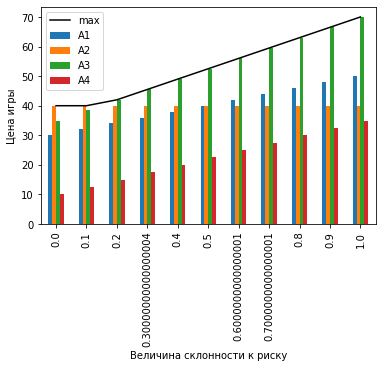

In [49]:
diagram = alpha_value[A_i].plot.bar()
diagram.set_xlabel("Величина склонности к риску")
diagram.set_ylabel("Цена игры")
plt.plot(10 * alpha_value.index, alpha_value['max'], color="black", label='max')
diagram.legend()
